In [38]:
from requests import get, post, Session
from datetime import datetime
import re

url = 'https://www.instagram.com'
resp = get(url)
csrf = re.search(r'{\\"config\\":{\\"csrf_token\\":\\"(.+?)\\"', resp.text).group(1)
# network -> tag-name -> headers ->  x-ig-app-id: 936619743392459
appid = re.search('"X-IG-App-ID":"(\d+)"', resp.text).group(1)
csrf, appid

('9wdiMuGT3uWwcKC6sfHdChWmv3PyZ2hL', '936619743392459')

'<!DOCTYPE html><html class="_9dls" lang="en" dir="ltr"><head><link data-default-icon="https://static.cdninstagram.com/rsrc.php/v3/yb/r/lswP1OF1o6P.png" rel="icon" sizes="192x192" href="https://static.cdninstagram.com/rsrc.php/v3/yb/r/lswP1OF1o6P.png" /><meta name="robots" content="noarchive, noimageindex" /><meta charset="utf-8" /><meta name="apple-mobile-web-app-status-bar-style" content="default" /><meta name="mobile-web-app-capable" content="yes" /><meta id="viewport" name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, viewport-fit=cover" /><meta name="theme-color" content="#ffffff" /><link rel="apple-touch-icon" sizes="76x76" href="https://static.cdninstagram.com/rsrc.php/v3/yR/r/lam-fZmwmvn.png" /><link rel="apple-touch-icon" sizes="120x120" href="https://static.cdninstagram.com/rsrc.php/v3/ys/r/aM-g435MtEX.png" /><link rel="apple-touch-icon" sizes="152x152" href="https://static.cdninstagram.com/rsrc.php/v3/yx/r/H1l_HHqi4p6.png" /><link
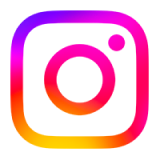
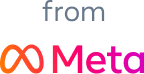

In [27]:
resp.text

In [39]:
params = {
    'enc_password' : '#PWD_INSTAGRAM_BROWSER:0:{}:{}',
    'username' : 's201802640@hufs-gsuite.kr',
    'queryParams' : {},
    'optIntoOneTap' : 'false',
    'trustedDeviceRecords' : {}
}

params['enc_password'] = params['enc_password'].format(
    int(datetime.now().timestamp()), 'sh42381120') # 본인 비밀번호
params

{'enc_password': '#PWD_INSTAGRAM_BROWSER:0:1679532467:sh42381120',
 'username': 's201802640@hufs-gsuite.kr',
 'queryParams': {},
 'optIntoOneTap': 'false',
 'trustedDeviceRecords': {}}

In [40]:
url = 'https://www.instagram.com/api/v1/web/accounts/login/ajax/'

session = Session()
# session.post(url, data=params).text
# token이 없다고 뜬다

In [41]:
# token을 넣어주자
headers = {
    'x-csrftoken' : csrf,
    'x-ig-app-id' : appid
    
}
resp = session.post(url, data=params, headers=headers)
resp.text

'{"user":true,"userId":"58481255759","authenticated":true,"oneTapPrompt":true,"status":"ok"}'

In [42]:
session.cookies.get_dict()

{'csrftoken': 'MD5DpjxXWWyqBSAuX0ExTCbGYwRrWLiW',
 'ds_user_id': '58481255759',
 'ig_did': '7DB86E9B-94A9-4822-A53B-DCDF69010C14',
 'mid': 'ZBuhtQAEAAG9uBguSUwbE5kdVH48',
 'rur': '"CCO\\05458481255759\\0541711068471:01f70d5fcee59d0e9cd56c3b4270302f7d7fb7a945855238443d265630fa062a9daa4172"',
 'sessionid': '58481255759%3AfJoH5VCWbnJJKp%3A1%3AAYeytuMslkj3VKzeD_9yoqNcbFhSamwmqsQhJa59bg'}

In [43]:
url = 'https://www.instagram.com/api/v1/tags/web_info/'
params = {'tag_name' : '한소희'}
headers['x-csrftoken'] = session.cookies.get('csrftoken')
# headers['x-ig-app-id'] = session.cookies.get('appid')

resp = session.get(url, params=params, headers=headers)
# headers['x-csrftoken'] = resp.headers['csrf']

In [45]:
resp.json()

{'count': 114349,
 'data': {'id': '17843654383023531',
  'name': '한소희',
  'media_count': 114349,
  'follow_status': 0,
  'following': 0,
  'allow_following': 1,
  'allow_muting_story': True,
  'profile_pic_url': 'https://scontent-gmp1-1.cdninstagram.com/v/t51.2885-15/337336359_1162121097806105_2880847194083222490_n.jpg?stp=dst-jpg_e35&_nc_ht=scontent-gmp1-1.cdninstagram.com&_nc_cat=105&_nc_ohc=7DuhCgDxVaEAX_zJkqh&edm=AGyKU4gBAAAA&ccb=7-5&ig_cache_key=MzA2NDIyNjEyNzUyNzM5NDA3OQ%3D%3D.2-ccb7-5&oh=00_AfB9OLKD2Yb-DzO90u356aQa-_pUwLz63o8n5t2zQZENbQ&oe=6420FFC7&_nc_sid=4cb768',
  'non_violating': 1,
  'related_tags': None,
  'subtitle': 'See a few top posts each week',
  'social_context': '',
  'social_context_profile_links': [],
  'social_context_facepile_users': [],
  'follow_button_text': None,
  'show_follow_drop_down': False,
  'formatted_media_count': '114K',
  'challenge_id': None,
  'is_trending': False,
  'destination_info': None,
  'description': None,
  'debug_info': None,
  'fres

In [ ]:
# 인스타그램 다음 페이지 가져오기
max_id, next_media_ids:[Array-List], page
=> 기존 페잊에서 가져와야 함

In [47]:
# !pip install selenium

# selenium

In [80]:
from selenium import webdriver
driver = webdriver.Chrome() # exe위치가 다른 경우 전체 경로 파라미터

In [50]:
driver.current_window_handle

'CE7EAE96704D56848AB468C79E0E1F6B'

In [51]:
# driver.close()

In [54]:
driver.get('https://www.naver.com')

In [ ]:
send_keys, click, clear
--> 입력 ,마우스, 지우고

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" c
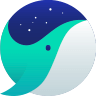
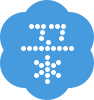

In [55]:
ddriver.page_source

In [57]:
# 어떻게 엘리멘트들을 찾을거냐
from selenium.webdriver.common.by import By

In [ ]:
# driver.find_element(By.CSS_SELECTOR, '')

In [59]:
query = driver.find_element(By.XPATH, '//input[@id="query"]')

In [60]:
query.send_keys('한', '소', '희')

In [61]:
query.get_attribute('value')

'한소희'

In [63]:
query.clear()

In [64]:
from selenium.webdriver.common.keys import Keys

In [65]:
query.send_keys('한', '소', '희', Keys.ENTER)

In [71]:
driver.execute_script('goOther')

JavascriptException: Message: javascript error: goOther is not defined
  (Session info: chrome=111.0.5563.111)
Stacktrace:
Backtrace:
	(No symbol) [0x0088DCE3]
	(No symbol) [0x008239D1]
	(No symbol) [0x00734DA8]
	(No symbol) [0x007376FB]
	(No symbol) [0x007375D0]
	(No symbol) [0x00737EB0]
	(No symbol) [0x0078DEED]
	(No symbol) [0x0077AECC]
	(No symbol) [0x0078D57C]
	(No symbol) [0x0077ACC6]
	(No symbol) [0x00756F68]
	(No symbol) [0x007580CD]
	GetHandleVerifier [0x00B03832+2506274]
	GetHandleVerifier [0x00B39794+2727300]
	GetHandleVerifier [0x00B3E36C+2746716]
	GetHandleVerifier [0x00936690+617600]
	(No symbol) [0x0082C712]
	(No symbol) [0x00831FF8]
	(No symbol) [0x008320DB]
	(No symbol) [0x0083C63B]
	BaseThreadInitThunk [0x764A7D69+25]
	RtlInitializeExceptionChain [0x777BB74B+107]
	RtlClearBits [0x777BB6CF+191]


In [ ]:
driver.find_element(By.XPAT, )

In [70]:
driver.find_element(By.CSS_SELECTOR, 'css selector 문법')

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"css selector 문법"}
  (Session info: chrome=111.0.5563.111)
Stacktrace:
Backtrace:
	(No symbol) [0x0088DCE3]
	(No symbol) [0x008239D1]
	(No symbol) [0x00734DA8]
	(No symbol) [0x0076019F]
	(No symbol) [0x007603AB]
	(No symbol) [0x0078EE62]
	(No symbol) [0x0077AF14]
	(No symbol) [0x0078D57C]
	(No symbol) [0x0077ACC6]
	(No symbol) [0x00756F68]
	(No symbol) [0x007580CD]
	GetHandleVerifier [0x00B03832+2506274]
	GetHandleVerifier [0x00B39794+2727300]
	GetHandleVerifier [0x00B3E36C+2746716]
	GetHandleVerifier [0x00936690+617600]
	(No symbol) [0x0082C712]
	(No symbol) [0x00831FF8]
	(No symbol) [0x008320DB]
	(No symbol) [0x0083C63B]
	BaseThreadInitThunk [0x764A7D69+25]
	RtlInitializeExceptionChain [0x777BB74B+107]
	RtlClearBits [0x777BB6CF+191]


In [66]:
driver.get_cookies()

[{'domain': '.naver.com',
  'expiry': 1682131149,
  'httpOnly': False,
  'name': 'nx_ssl',
  'path': '/',
  'sameSite': 'Lax',
  'secure': False,
  'value': '2'},
 {'domain': '.naver.com',
  'expiry': 1679539449,
  'httpOnly': False,
  'name': '_naver_usersession_',
  'path': '/',
  'sameSite': 'Lax',
  'secure': False,
  'value': '18mBgTC0HtGFxTEf7f+doQ=='},
 {'domain': '.naver.com',
  'httpOnly': False,
  'name': 'page_uid',
  'path': '/',
  'sameSite': 'Lax',
  'secure': False,
  'value': 'itXJzdprvTossKzqUhZsssssslG-099994'},
 {'domain': '.naver.com',
  'expiry': 1714099151,
  'httpOnly': False,
  'name': 'NNB',
  'path': '/',
  'sameSite': 'None',
  'secure': True,
  'value': 'TJ6JCQHEW4NWI'}]

In [72]:
driver.find_element(By.CSS_SELECTOR, 'a.link_login').click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"a.link_login"}
  (Session info: chrome=111.0.5563.111)
Stacktrace:
Backtrace:
	(No symbol) [0x0088DCE3]
	(No symbol) [0x008239D1]
	(No symbol) [0x00734DA8]
	(No symbol) [0x0076019F]
	(No symbol) [0x007603AB]
	(No symbol) [0x0078EE62]
	(No symbol) [0x0077AF14]
	(No symbol) [0x0078D57C]
	(No symbol) [0x0077ACC6]
	(No symbol) [0x00756F68]
	(No symbol) [0x007580CD]
	GetHandleVerifier [0x00B03832+2506274]
	GetHandleVerifier [0x00B39794+2727300]
	GetHandleVerifier [0x00B3E36C+2746716]
	GetHandleVerifier [0x00936690+617600]
	(No symbol) [0x0082C712]
	(No symbol) [0x00831FF8]
	(No symbol) [0x008320DB]
	(No symbol) [0x0083C63B]
	BaseThreadInitThunk [0x764A7D69+25]
	RtlInitializeExceptionChain [0x777BB74B+107]
	RtlClearBits [0x777BB6CF+191]


In [ ]:
ID, PW, 클릭버튼 => CSS

In [76]:
driver.find_element(By.CSS_SELECTOR, 'input[name=id]').clear()
driver.find_element(By.CSS_SELECTOR, 'input[name=id]').send_keys('shrwei')
driver.find_element(By.CSS_SELECTOR, 'input[name=pw]').clear()
driver.find_element(By.CSS_SELECTOR, 'input[name=pw]').send_keys('dksgmdehd0105')
driver.find_element(By.CSS_SELECTOR, 'button[id$=login]')

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=111.0.5563.111)
Stacktrace:
Backtrace:
	(No symbol) [0x0088DCE3]
	(No symbol) [0x008239D1]
	(No symbol) [0x00734DA8]
	(No symbol) [0x0071D0D3]
	(No symbol) [0x0077EA8B]
	(No symbol) [0x0078D093]
	(No symbol) [0x0077ACC6]
	(No symbol) [0x00756F68]
	(No symbol) [0x007580CD]
	GetHandleVerifier [0x00B03832+2506274]
	GetHandleVerifier [0x00B39794+2727300]
	GetHandleVerifier [0x00B3E36C+2746716]
	GetHandleVerifier [0x00936690+617600]
	(No symbol) [0x0082C712]
	(No symbol) [0x00831FF8]
	(No symbol) [0x008320DB]
	(No symbol) [0x0083C63B]
	BaseThreadInitThunk [0x764A7D69+25]
	RtlInitializeExceptionChain [0x777BB74B+107]
	RtlClearBits [0x777BB6CF+191]


In [77]:
driver.current_window_handle

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=111.0.5563.111)
Stacktrace:
Backtrace:
	(No symbol) [0x0088DCE3]
	(No symbol) [0x008239D1]
	(No symbol) [0x00734DA8]
	(No symbol) [0x0071D0D3]
	(No symbol) [0x0077EA8B]
	(No symbol) [0x007830CB]
	(No symbol) [0x0077AE93]
	(No symbol) [0x00756F68]
	(No symbol) [0x007580CD]
	GetHandleVerifier [0x00B03832+2506274]
	GetHandleVerifier [0x00B39794+2727300]
	GetHandleVerifier [0x00B3E36C+2746716]
	GetHandleVerifier [0x00936690+617600]
	(No symbol) [0x0082C712]
	(No symbol) [0x00831FF8]
	(No symbol) [0x008320DB]
	(No symbol) [0x0083C63B]
	BaseThreadInitThunk [0x764A7D69+25]
	RtlInitializeExceptionChain [0x777BB74B+107]
	RtlClearBits [0x777BB6CF+191]


In [89]:
driver.delete_all_cookies()

In [90]:
driver.get_cookies()

[]

In [84]:
c = '''
nid_buk	QGXJ6M6CHL7GC	.nid.naver.com	/	2024-04-25T01:20:07.378Z	20		✓			Medium	
NID_JKL	YLHMxJWVzE8Z4rDArST46yNts6G7OiWfZhYsdzBY3ZQ=	.naver.com	/	Session	51		✓			Medium	
NID_SES	AAABle7HuCPmeXyq3FAE/k7YPw57i+CEkBYTug0XP+KfUXbsKEX9ovCmEeCQeiaVGgUeA+KXOJMjf322PqR3sMiVcBJYkXHw14mmgtcDOFxIi4y6OIsBEbdrirm0EdRZMb4/sFUXsjuitARCqNxgoN2lt9zHNLzdUA/IY9KevoIEDY5v9nVtkDt1nM2Cr+EK/4xSbn0dJY3dcd9Q7goLoxNCubbeIlvT70s3TjZ2qRbMkruDMmk8nuPUU/9UMx3T5/mDtBPwk69tz2GkF8VXzZ6JkTCT47Li5lf0U0rUxgNVIPFk17PobyDUDcjUNxwIpqtj5aKJRbwdj7rENiqAj/k3Y+Y/X2tNtKtKo9HvRcJNTqit9E6nruP+tTHLfVTzDHt90np6HYaMpk4k80PSOEbA/IiTly6YaWUjSkaQKRYH9vErrBc1ysIv5R3Rk4lGEEJIKQHqFR5e0I03GuqEh3555gAsLpKIlnUps1u6VPF30pxGPWt8lrmf1pL2Zu04s4DWtyalwpd9WEK1bb+ir/2yK+g8eLSF38JJ0pWj1/88t0vh	.naver.com	/	Session	567					Medium	
NID_AUT	V8CFO2+VEk7w9oOrAkPVVdey8QTom0OuFTADezzmMg5DesjULdyzW2gVBs5GpwkU	.naver.com	/	Session	71	✓				Medium	
nid_slevel	1	.nid.naver.com	/	2024-03-22T02:57:44.000Z	11					Medium	
NNB	4BJHMVWGK4NGI	.naver.com	/	2024-04-26T02:57:51.904Z	16		✓	None		Medium	
nid_inf	1264869107	.naver.com	/	Session	17					Medium	
SB_MODE	plusdeal	www.naver.com	/	Session	15					Medium	
JSESSIONID	354F6F96E2B6AC2721B44E516EC4B5AA	www.naver.com	/	Session	42	✓				Medium	
PM_CK_loc	5b3cfba8eee6debe05f5d6bd00f0cae57e412f6260b16726ea1977c9a8741987	www.naver.com	/	2023-03-24T00:25:54.764Z	73	✓				Medium	
'''

for line in c.splitlines()[1:]:
    driver.add_cookie({'name':line.split()[0], 'value':line.split()[1]})

In [85]:
driver.refresh()

In [87]:
driver.get('https://mail.naver.com')

In [100]:
logout = driver.find_element(By.CSS_SELECTOR, '#gnb_logout_button')

In [101]:
logout.is_displayed(), logout.is_enabled(), logout.is_selected()

(False, True, False)

In [102]:
from bs4 import BeautifulSoup
dom = BeautifulSoup(driver.page_source, 'html.parser')

In [103]:
dom.select_one('#gnb_logout_button')

<a class="gnb_btn_login" href="https://nid.naver.com/nidlogin.logout?returl=https://www.naver.com" id="gnb_logout_button"><span class="gnb_bg"></span><span class="gnb_bdr"></span><span class="gnb_txt">로그아웃</span></a>

In [104]:
logout

<selenium.webdriver.remote.webelement.WebElement (session="4877eb80c7047635a484d85f8c30f13c", element="f64fb854-8754-4d9e-9f46-28039da0b849")>

In [105]:
# 화면상에 안 보이니까 에러가 난다
logout.click()

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=111.0.5563.111)
Stacktrace:
Backtrace:
	(No symbol) [0x0088DCE3]
	(No symbol) [0x008239D1]
	(No symbol) [0x00734C70]
	(No symbol) [0x007610D6]
	(No symbol) [0x00758D05]
	(No symbol) [0x0077AECC]
	(No symbol) [0x00758726]
	(No symbol) [0x0077B224]
	(No symbol) [0x0078D57C]
	(No symbol) [0x0077ACC6]
	(No symbol) [0x00756F68]
	(No symbol) [0x007580CD]
	GetHandleVerifier [0x00B03832+2506274]
	GetHandleVerifier [0x00B39794+2727300]
	GetHandleVerifier [0x00B3E36C+2746716]
	GetHandleVerifier [0x00936690+617600]
	(No symbol) [0x0082C712]
	(No symbol) [0x00831FF8]
	(No symbol) [0x008320DB]
	(No symbol) [0x0083C63B]
	BaseThreadInitThunk [0x764A7D69+25]
	RtlInitializeExceptionChain [0x777BB74B+107]
	RtlClearBits [0x777BB6CF+191]


In [ ]:
# 해결방법
# 암묵적, 표면적으로 기다려주는애들이 있다.
Explicit Wait, Implicit Wait

# time sleep이랑 다르다
sleep은 그 상태로 아무짓도 안 함

In [ ]:
driver.implicitly_wait()

In [106]:
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions

In [ ]:
wait 

In [108]:
wait.until(expected_conditions.element_to_be_clickable(logout))

NameError: name 'wait' is not defined